In [1]:
import numpy as np
from scipy import optimize
from numpy import ones, zeros, column_stack, exp, dot, log, newaxis


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# data = load('ex2data1.txt');
data = np.loadtxt('ex2data1.txt', delimiter=',')
#X = data(:, [1, 2]); 
features = data[:,:2]
#y = data(:, 3);
y = data[:,2]

Part 1: Plotting 
====================
Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


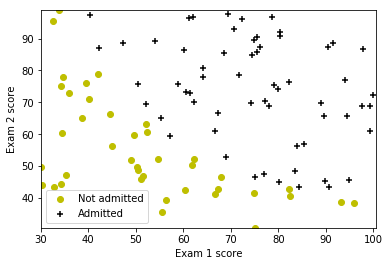

In [3]:

plt.scatter(features[y==0,0], features[y==0,1],color='y', marker='o', label='Not admitted')
plt.scatter(features[y==1,0], features[y==1,1], color='k', marker='+', label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.autoscale(tight=True)
plt.legend(loc=3)
plt.show()

Part 2: Compute Cost and Gradient 
============

In this part of the exercise, you will implement the cost and gradient
for logistic regression. 
Setup the data matrix appropriately, and add ones for the intercept term

In [4]:
m, n = features.shape
features.shape

(100, 2)

In [5]:
X = column_stack((ones((m, 1)), features))

In [6]:
initial_theta = zeros((n+1))

In [8]:
# this is the hypothsis function h(X)
def sigmoid(z): 
    return 1/(1+exp(-z))

In [9]:
def costFunction(initial_theta, X, y):
    # J = (-1/m) * sum(     y .* log(sigmoid(X*theta))     +     (1-y) .* log(1 - sigmoid(X*theta))     );
    h_of_X = sigmoid(dot(X, initial_theta[:,newaxis]))
    J = np.sum(-y[:, newaxis] * log(h_of_X) - 
                  (1-y[:, newaxis])*log(1-h_of_X))/X.shape[0]
    return J

In [10]:
def gradient(theta, X, y):
    # grad = (1/m) *  ( (sigmoid(X*theta) - y)'  * X );
    h_of_X = sigmoid(dot(X, theta[:,newaxis]))    
    grad = dot(X.T,h_of_X-y[:, newaxis])/X.shape[0]
    #print grad.flatten()

    return grad.flatten()

In [11]:
initial_theta
gradient(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
# helpful links 
# http://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
# http://stackoverflow.com/questions/29229810/optimisation-using-scipy
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html
# https://www.kunxi.org/notes/Machine_Learning/Logistic_Regression/
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#example-linear-model-plot-iris-logistic-py
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# 

'''
method : str or callable, optional
Type of solver. Should be one of
    ‘Nelder-Mead’ (see here)
    ‘Powell’ (see here)
    ‘CG’ (see here)
    ‘BFGS’ (see here)
    ‘Newton-CG’ (see here)
    ‘L-BFGS-B’ (see here)
    ‘TNC’ (see here)
    ‘COBYLA’ (see here)
    ‘SLSQP’ (see here)
    ‘dogleg’ (see here)
    ‘trust-ncg’ (see here)
    custom - a callable object (added in version 0.14.0), see below for description.
'''
res = optimize.minimize(fun=costFunction, x0 =initial_theta, args=(X,y), method='TNC', jac=gradient)


In [13]:
s = np.array([1, 45, 85]).reshape((1,3))

def predict(s):
    return sigmoid(s.dot(res.x[:,newaxis]))
print 'For a student with scores 45 and 85, we predict an admission probability of ', predict(s)[0,0]


For a student with scores 45 and 85, we predict an admission probability of  0.776290622946


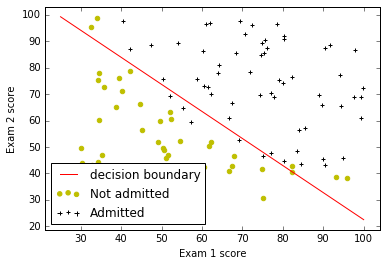

In [22]:
plt.scatter(features[y==0,0], features[y==0,1],color='y', marker='o', label='Not admitted')
plt.scatter(features[y==1,0], features[y==1,1], color='k', marker='+', label='Admitted')

xex = np.linspace(25,100,50)
yes = (res.x[0]+res.x[1]*xex)/-res.x[2]

plt.plot(xex, yes, color='r', label='decision boundary')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.autoscale(tight=True)
plt.legend(loc=3)
plt.show()

In [15]:
# Compute accuracy on our training set

print X.shape
def predict(theta, X):
    pred = sigmoid(X.dot(theta[:, newaxis]))
    pred[pred<0.5]=0
    pred[pred>=0.5]=1
    return pred
p =predict(res.x, X)
p[p==y[:,newaxis]]=1

print 'Train Accuracy: ',np.mean(p) * 100;

(100, 3)
Train Accuracy:  95.0


## Classification Using Keras

In [7]:
from keras.models import Sequential     # adding elements(i.e. layers) into this model in a sequence
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [11]:
print(features.shape)
print(y.shape)

(100, 2)
(100,)


In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(features, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 8.4929 - acc: 0.4600     
Epoch 2/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 3/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000     
Epoch 4/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 5/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 6/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 7/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 8/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000     
Epoch 9/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 10/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.4000      
Epoch 11/25
100/100 [==============================] - 0s - loss: 9.6709 - acc: 0.

In [22]:
# temp = np.random.randn(50, 2)
y_class_pred = model.predict(features) > 0.5

from sklearn.metrics import accuracy_score

print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.400


The accuracy score is 0.400
